# Zadanie: porównanie metod klasteringu
Zajmiemy zbiorem danych z telefonów Samsung, dotyczących aktywności fizycznej.

Dane są zebrane w pliku Samsung_HAR.zip. Należy je rozpakować i przeanalizować.

Obróbka danych wejściowych:
- Czy potrzeba wszystkich cech?
- Czy potrzebna jest jakaś obróbka?
- Czy wiemy, jak obrobić?
- Czy wiemy, co jaka cecha znaczy?
- Czy potrzebujemy aż dwóch plików?

Pamiętajmy, że mamy do czynienia z Unsupervised Learning. Czy podział na dane testowe i treningowe jest potrzebny, jeśli tak to dlaczego, jeśli nie to dlaczego?

Do zrobienia:
- Użyj poznanych metod klasteringu, aby podzielić dany zbiór (pamiętaj o skalowaniu itp.).
- Zwizualizuj podział przez każdy algorytm (możesz użyć metod z notatników).

Z jakim typem czynności algorytmy poradziły sobie super, z jakim nie najlepiej. Typy czynności (dane zawarte w plikach *labels):
        – marsz
        – wchodzenie w górę po schodach
        – schodzenie w dół ze schodów
        – siedzenie
        – stanie
        – leżenie

Dobierz prawidłową ilość klastrów w przypadku metody KMeans.

Na danym zbiorze dokonaj preprocessingu, używając metod klasteringu. Następnie wyszkol dwa wybrane przez siebie klasyfikatory typu Supervised Learning i spróbuj uzyskać jak najlepszy wynik, używając wszystkich znanych sobie "wspomagaczy".

W przypadku użycia train_test_split albo KFold/StratifiedKFold, możemy połączyć zbiory, gdyż i tak wydzielamy zbiór walidacyjny.

Chyba że chcemy mieć dodatkowy zbiór testowy do przetestowania modeli po wyszkoleniu. Chcemy?

Ideą klasteringu jest podział na podgrupy, czyli tutaj oczekujemy, że nasze algorytmy podzielą zbiór na 6 wspomnianych klastrów: marsz, wchodzenie/schodzenie po schodach, siedzenie, stanie, leżenie. Zbadaj, jak są porozrzucane w różnych klastrach. Im bardziej są rozrzucone, tym algorytm gorzej sobie z nimi radzi. Ideałem jest: jeden klaster, jedna czynność.

Na koniec pytanie, na które należy również odpowiedzieć, a które pojawia się zawsze podczas rozmów kwalifikacyjnych:
- czym różni się KMeans, K-fold i K Nearest Neighbors (o tym ostatnim trzeba doczytać).

Sprawdzanie struktury folderów...
Bieżący folder: C:\Users\User\Desktop\Kodilla\Kodilla_m16
Zawartość folderu: ['.git', '.ipynb_checkpoints', 'anaconda_projects', 'Example.ipynb', 'README.md', 'samsung_HAR', 'Task_1.ipynb', 'Task_16.4.ipynb', 'Task_16.5.ipynb', 'unsupervised_learning']

Zawartość folderu samsung_HAR/: ['samsung_test.txt', 'samsung_test_labels.txt', 'samsung_train.txt', 'samsung_train_labels.txt']

Dane wczytane pomyślnie. Kształt danych: (7352, 561)

Przygotowywanie danych...
Pierwsze 5 wierszy danych:
        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8     

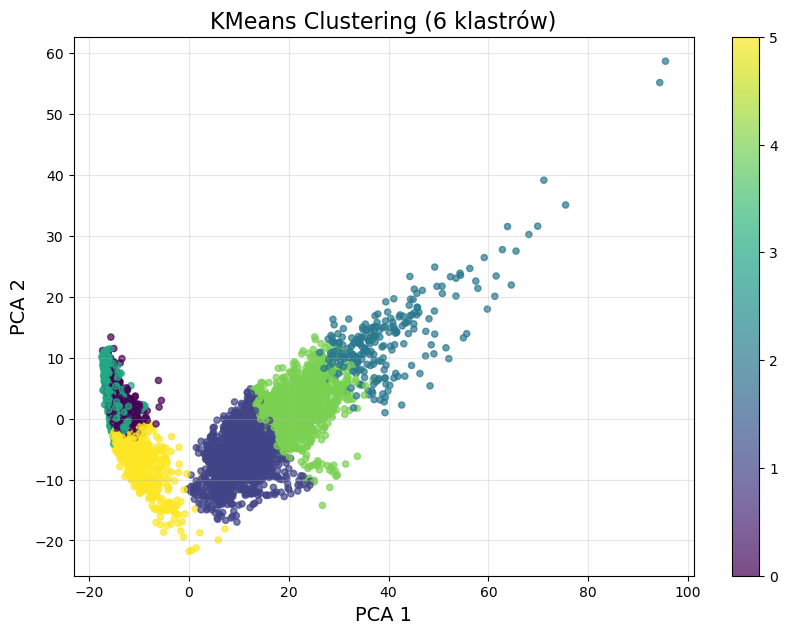

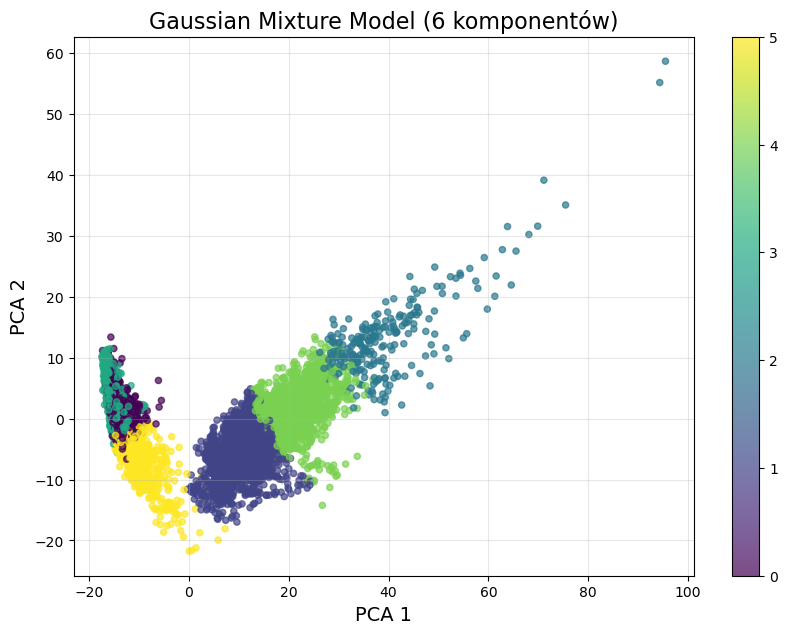

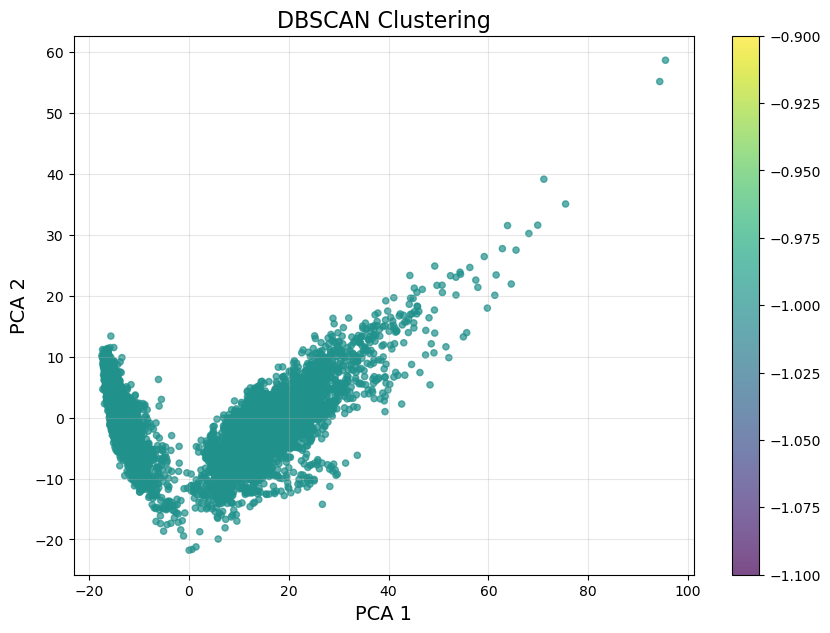


Ocena jakości klasteryzacji:
Silhouette Score (KMeans): 0.109
Silhouette Score (GMM): 0.110
DBSCAN nie znalazł klastrów (wszystkie punkty oznaczone jako szum)

Porównanie z prawdziwymi etykietami:
Adjusted Rand Index (KMeans): 0.420
Adjusted Rand Index (GMM): 0.431

Analiza optymalnej liczby klastrów (metoda silhouette)...
k=2, Silhouette Score: 0.397
k=3, Silhouette Score: 0.327
k=4, Silhouette Score: 0.161
k=5, Silhouette Score: 0.131
k=6, Silhouette Score: 0.109
k=7, Silhouette Score: 0.111
k=8, Silhouette Score: 0.090
k=9, Silhouette Score: 0.084
k=10, Silhouette Score: 0.082


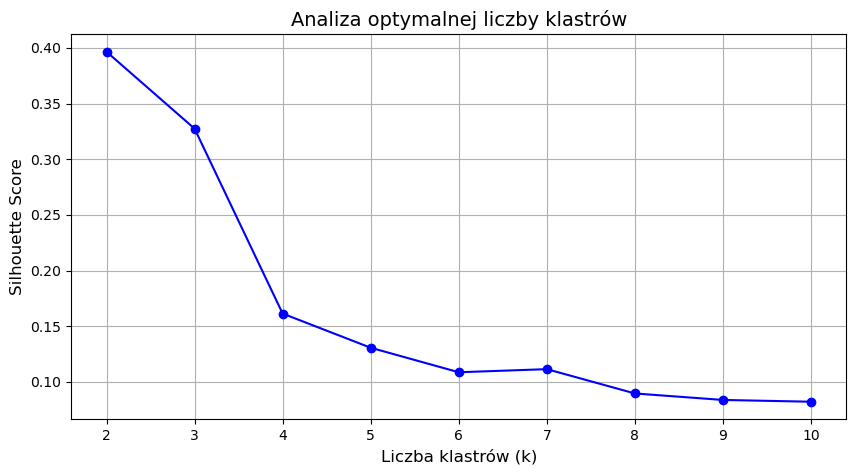


Przygotowywanie danych do klasyfikacji...

Trenowanie Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Random Forest - najlepsze parametry: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Raport klasyfikacji:
              precision    recall  f1-score   support

         1.0       0.56      0.58      0.57       247
         2.0       0.65      0.45      0.53       200
         3.0       0.56      0.69      0.62       206
         4.0       0.50      0.27      0.35       262
         5.0       0.52      0.64      0.57       276
         6.0       0.62      0.74      0.67       280

    accuracy                           0.56      1471
   macro avg       0.57      0.56      0.55      1471
weighted avg       0.56      0.56      0.55      1471


Trenowanie SVM...
Fitting 3 folds for each of 9 candidates, totalling 27 fits

SVM - najlepsze parametry: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Raport klasyfikacji:
              precision    re

In [7]:
# Importowanie niezbędnych bibliotek
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

%matplotlib inline

# 1. Wczytanie danych
print("Sprawdzanie struktury folderów...")
data_path = 'samsung_HAR/'
print(f"Bieżący folder: {os.getcwd()}")
print(f"Zawartość folderu: {os.listdir('.')}")

if not os.path.exists(data_path):
    raise FileNotFoundError(f"Nie znaleziono folderu {data_path}. Upewnij się, że istnieje w tym samym folderze co notebook.")

print(f"\nZawartość folderu {data_path}: {os.listdir(data_path)}")

try:
    y = np.loadtxt(os.path.join(data_path, 'samsung_train_labels.txt'))
    data = np.loadtxt(os.path.join(data_path, 'samsung_train.txt'))
    print(f"\nDane wczytane pomyślnie. Kształt danych: {data.shape}")
except Exception as e:
    print(f"\nBłąd podczas wczytywania danych: {e}")
    raise

# 2. Przygotowanie danych
print("\nPrzygotowywanie danych...")
df = pd.DataFrame(data)
print("Pierwsze 5 wierszy danych:")
print(df.head())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
print("\nDane po redukcji wymiarów (PCA):")
print(df_pca.head())

# 3. Klasteryzacja
print("\nUruchamianie algorytmów klasteryzacji...")
kmeans = KMeans(n_clusters=6, random_state=42)
gmm = GaussianMixture(n_components=6, random_state=42)
dbscan = DBSCAN(eps=1.5, min_samples=10)

y_kmeans = kmeans.fit_predict(X_scaled)
y_gmm = gmm.fit_predict(X_scaled)
y_dbscan = dbscan.fit_predict(X_scaled)

# 4. Wizualizacja wyników
def plot_clusters(X_2d, labels, title):
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', s=20, alpha=0.7)
    plt.title(title, fontsize=16)
    plt.xlabel("PCA 1", fontsize=14)
    plt.ylabel("PCA 2", fontsize=14)
    plt.colorbar(scatter)
    plt.grid(True, alpha=0.3)
    plt.show()

print("\nWizualizacja wyników klasteryzacji:")
plot_clusters(X_pca, y_kmeans, "KMeans Clustering (6 klastrów)")
plot_clusters(X_pca, y_gmm, "Gaussian Mixture Model (6 komponentów)")
plot_clusters(X_pca, y_dbscan, "DBSCAN Clustering")

# 5. Ocena jakości klasteryzacji
print("\nOcena jakości klasteryzacji:")
print(f"Silhouette Score (KMeans): {silhouette_score(X_scaled, y_kmeans):.3f}")
print(f"Silhouette Score (GMM): {silhouette_score(X_scaled, y_gmm):.3f}")

if len(np.unique(y_dbscan)) > 1:
    print(f"Silhouette Score (DBSCAN): {silhouette_score(X_scaled, y_dbscan):.3f}")
else:
    print("DBSCAN nie znalazł klastrów (wszystkie punkty oznaczone jako szum)")

print("\nPorównanie z prawdziwymi etykietami:")
print(f"Adjusted Rand Index (KMeans): {adjusted_rand_score(y, y_kmeans):.3f}")
print(f"Adjusted Rand Index (GMM): {adjusted_rand_score(y, y_gmm):.3f}")

# 6. Analiza optymalnej liczby klastrów dla KMeans
print("\nAnaliza optymalnej liczby klastrów (metoda silhouette)...")
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score: {score:.3f}")

plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Liczba klastrów (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Analiza optymalnej liczby klastrów', fontsize=14)
plt.grid(True)
plt.show()

# 7. Klasyfikacja z wykorzystaniem cech klastrowych
print("\nPrzygotowywanie danych do klasyfikacji...")
kmeans_final = KMeans(n_clusters=2, random_state=42)
X_cluster_features = kmeans_final.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_cluster_features, y, test_size=0.2, random_state=42)

# Random Forest
print("\nTrenowanie Random Forest...")
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

print("\nRandom Forest - najlepsze parametry:", grid_rf.best_params_)
print("Raport klasyfikacji:")
print(classification_report(y_test, best_rf.predict(X_test)))

# SVM
print("\nTrenowanie SVM...")
param_grid_svc = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", 0.01, 0.001],
    "kernel": ["rbf"]
}

grid_svc = GridSearchCV(SVC(random_state=42), param_grid_svc, cv=3, n_jobs=-1, verbose=1)
grid_svc.fit(X_train, y_train)
best_svc = grid_svc.best_estimator_

print("\nSVM - najlepsze parametry:", grid_svc.best_params_)
print("Raport klasyfikacji:")
print(classification_report(y_test, best_svc.predict(X_test)))

print("\nWszystkie operacje zakończone pomyślnie!")